In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
img = 'Transfers0312.png'

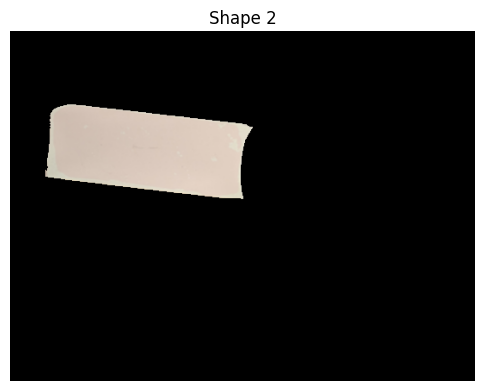

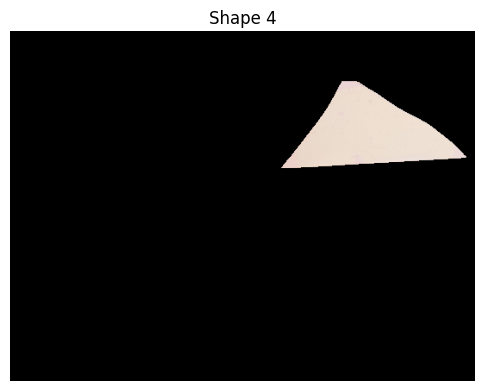

In [10]:

# Load the image
image_path = img # Update with the correct path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding to segment the silver/tan shapes
_, thresh = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY)

# Find contours of the segmented shapes
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours to keep only the shapes in the top half of the image
image_height, image_width = gray.shape
top_half_contours = [cnt for cnt in contours if cv2.boundingRect(cnt)[1] < image_height // 2]

# Further filtering: Ignore borders, text, and bottom right region
filtered_contours = []
for cnt in top_half_contours:
    x, y, w, h = cv2.boundingRect(cnt)
    if x < 10 or y < 10 or (x + w) > (image_width - 10) or (y + h) > (image_height - 10):
        continue
    if y < image_height * 0.1:
        continue
    if x > image_width * 0.6 and y > image_height * 0.5:
        continue
    filtered_contours.append(cnt)

# Extract and display individual shapes (Shape 2 and 3)
selected_shapes = [1, 3]  # Indices corresponding to Shape 2 and 3

for i, shape_idx in enumerate(selected_shapes):
    # Create a mask for the specific shape
    single_shape_mask = np.zeros_like(gray)
    cv2.drawContours(single_shape_mask, [filtered_contours[shape_idx]], -1, (255), thickness=cv2.FILLED)

    # Apply the mask to isolate the shape
    single_shape = cv2.bitwise_and(image_rgb, image_rgb, mask=single_shape_mask)

    # Display the isolated shape
    plt.figure(figsize=(6, 6))
    plt.imshow(single_shape)
    plt.axis("off")
    plt.title(f"Shape {shape_idx + 1}")
    plt.show()


In [11]:
# Calculate and display the areas of the selected shapes
shape_areas = {}

for i, shape_idx in enumerate(selected_shapes):
    area = cv2.contourArea(filtered_contours[shape_idx])
    shape_areas[f"Shape {shape_idx + 1}"] = area

# Print the areas
for shape, area in shape_areas.items():
    print(f"{shape} Area: {area} pixels²")


Shape 2 Area: 19648.0 pixels²
Shape 4 Area: 11366.0 pixels²


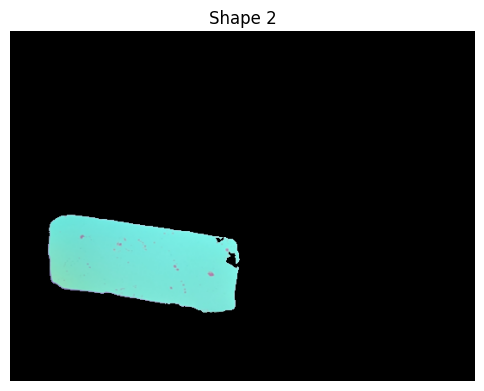

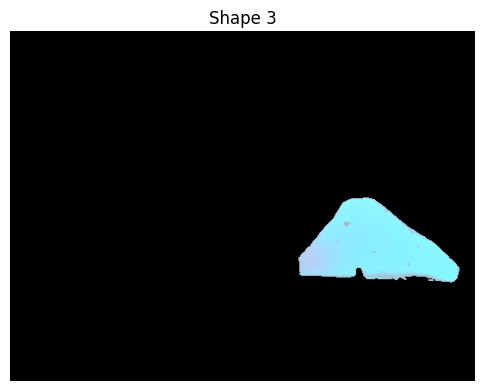

Shape 2 Area: 18313.0 pixels²
Shape 3 Area: 11126.0 pixels²


In [12]:
image_path = img # Update with the correct path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Convert image to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define HSV range for blue/teal colors
lower_blue = np.array([80, 50, 50])
upper_blue = np.array([140, 255, 255])
blue_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)

# Define HSV range for violet/purple colors
lower_purple = np.array([130, 50, 50])
upper_purple = np.array([170, 255, 255])
purple_mask = cv2.inRange(hsv_image, lower_purple, upper_purple)

# Remove violet/purple areas from blue mask
refined_blue_mask = cv2.bitwise_and(blue_mask, cv2.bitwise_not(purple_mask))

# Find contours of the refined blue/teal areas
refined_blue_contours, _ = cv2.findContours(refined_blue_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Extract and display individual shapes (Shape 2 and 3)
selected_blue_shapes = [1, 2]  # Indices corresponding to Shape 2 and 3

shape_areas = {}

for shape_idx in selected_blue_shapes:
    # Create a mask for the specific shape
    single_shape_mask = np.zeros_like(gray)
    cv2.drawContours(single_shape_mask, [refined_blue_contours[shape_idx]], -1, (255), thickness=cv2.FILLED)

    # Apply the mask to isolate the shape
    single_shape = cv2.bitwise_and(image_rgb, image_rgb, mask=single_shape_mask)

    # Calculate area
    area = cv2.contourArea(refined_blue_contours[shape_idx])
    shape_areas[f"Shape {shape_idx + 1}"] = area

    # Display the isolated shape
    plt.figure(figsize=(6, 6))
    plt.imshow(single_shape)
    plt.axis("off")
    plt.title(f"Shape {shape_idx + 1}")
    plt.show()

# Print the areas of Shape 2 and 3
for shape, area in shape_areas.items():
    print(f"{shape} Area: {area} pixels²")
